In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import pandas as pd
from datetime import datetime

pd.set_option("display.max_columns", 101)

In [2]:
from src.data.VOC2012.data_preprocess import load_preprocess_save
from src.data.VOC2012.data import classes
#json_file = 'data/preprocessed/VOC2012/annotations.json'
pickle_file = 'data/preprocessed/VOC2012/preprocessed.pkl'
#df = load_preprocess_save(json_file, pickle_file)
df = pd.read_pickle(pickle_file)
df.head()

,folder,filename,object,width,height,depth,object_count,img_id,output,has_person,class,is_object,bb_coords,bb_sizes,bb_area,grid_box,bb_index,class_single,is_object_single,bb_coords_single,bb_sizes_single,weights,grid_0_0,grid_0_1,grid_0_2,grid_0_3,grid_1_0,grid_1_1,grid_1_2,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]",[0.1800411522633745],"[[(2.0, 1.0)]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]","[[[1]], [[1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",True,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1]]","[[0.916, 0.8642857142857143], [0.32, 0.5071428...","[[0.542, 0.3736654804270463], [0.128, 0.124555...","[0.2025266903914591, 0.01594306049822064, 0.00...","[[(1.0, 1.0), (1.0, 1.0), (1.0, 2.0), (0.0, 3....",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.916, 0.8642857142857143]]","[[0.542, 0.3736654804270463]]","[[[1], [1], [1], [1]], [[1], [1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.28, 0.05, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.632, 0.92142856, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,VOC2012,2007_000033.jpg,"[{'grid_box': (2.0, 2.0), 'class': [0], 'is_ob...",500,366,3,3,2,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1]]","[[0.032, 0.03296703296703297], [0.612, 0.34065...","[[0.98, 0.4262295081967213], [0.122, 0.0710382...","[0.41770491803278686, 0.008666666666666666, 0....","[[(2.0, 2.0), (3.0, 2.0), (2.0, 2.0)]]",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.032, 0.03296703296703297]]","[[0.98, 0.4262295081967213]]","[[[1], [1], [1]], [[1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
3,VOC2012,2007_000039.jpg,"[{'grid_box': (2.0, 1.0), 'class': [19], 'is_o...",500,375,3,1,3,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.0, 0.978494623655914]]","[[0.376, 0.5066666666666667]]",[0.19050666666666669],"[[(2.0, 1.0)]]",0,"[

In [3]:
df['grid_output'][0]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.16115703, 0.808     , 0.3600823 , 0.5       , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        ,

In [4]:
df = df[df['has_person']].reset_index()

In [5]:
df.head()

,index,folder,filename,object,width,height,depth,object_count,img_id,output,has_person,class,is_object,bb_coords,bb_sizes,bb_area,grid_box,bb_index,class_single,is_object_single,bb_coords_single,bb_sizes_single,weights,grid_0_0,grid_0_1,grid_0_2,grid_0_3,grid_1_0,grid_1_1,grid_1_2,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]",[0.1800411522633745],"[[(2.0, 1.0)]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.16115702479338842, 0.808]]","[[0.360082304526749, 0.5]]","[[[1]], [[1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",True,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1]]","[[0.916, 0.8642857142857143], [0.32, 0.5071428...","[[0.542, 0.3736654804270463], [0.128, 0.124555...","[0.2025266903914591, 0.01594306049822064, 0.00...","[[(1.0, 1.0), (1.0, 1.0), (1.0, 2.0), (0.0, 3....",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.916, 0.8642857142857143]]","[[0.542, 0.3736654804270463]]","[[[1], [1], [1], [1]], [[1], [1], [1], [1]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.28, 0.05, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.632, 0.92142856, 0.036, 0.17437722, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,10,VOC2012,2007_000129.jpg,"[{'grid_box': (1.0, 2.0), 'class': [1], 'is_ob...",334,500,3,6,10,"[[0.1002994, 0.364, 0.19461077, 0.724, 1.0, 0....",True,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1], [1], [1], [1], [1], [1]]","[[0.9578313253012049, 0.808], [0.5240963855421...","[[0.5538922155688623, 0.596], [0.2485029940119...","[0.3301197604790419, 0.12822754491017962, 0.11...","[[(1.0, 2.0), (3.0, 2.0), (0.0, 2.0), (0.0, 1....",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[1]],"[[0.08433734939759036, 0.852]]","[[0.592814371257485, 0.922]]","[[[1], [1], [1], [1], [1], [1]], [[1], [1], [1...","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.40361446, 0.456, 0.19461077, 0.724, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.084337346, 0.852, 0.5928144, 0.922, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.5301205, 0.024, 0.24550898, 0.936, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.40361446, 0.45..."
3,11,VOC2012,2007_000170.jpg,"[{'grid_box': (0.0, 1.0), 'class': [4], 'is_ob...",500,375,3,6,11,"[[0.046, 0.396, 0.08, 0.30666667, 1.0, 0.0, 0....",True,"[[0.0, 

In [16]:
import pandas as pd
from src.models.YOLOv3 import create_and_fit

pickle_file = 'data/preprocessed/VOC2012/preprocessed.pkl'
df = pd.read_pickle(pickle_file)
df = df[df['has_person']].reset_index()
model = create_and_fit(df.head().iloc[[0]], 30,64, verbose=1, val_split=0.1)

Logs: 2019_11_22_21_02_48
Found 1 validated image filenames.
Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 2.2001 - precision: 0.1667
Epoch 2/30
1/1 [==============================] - 1s 983ms/step - loss: 2.1653 - precision: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 1s 974ms/step - loss: 2.2085 - precision: 1.0000
Epoch 4/30
1/1 [==============================] - 1s 971ms/step - loss: 1.4202 - precision: 1.0000
Epoch 5/30
1/1 [==============================] - 1s 973ms/step - loss: 2.3690 - precision: 1.0000
Epoch 6/30
1/1 [==============================] - 1s 982ms/step - loss: 0.6265 - precision: 1.0000
Epoch 7/30
1/1 [==============================] - 1s 989ms/step - loss: 0.4451 - precision: 1.0000
Epoch 8/30
1/1 [==============================] - 1s 993ms/step - loss: 0.5598 - precision: 1.0000
Epoch 9/30
1/1 [==============================] - 1s 976ms/step - loss: 0.3513 - precision: 1.0000
Epoch 10/30
1/1 [==============================

Found 5 validated image filenames.
2 1 [0.16684622 0.8072881 ] [0.3703428  0.48396102] 0.945176 1.0


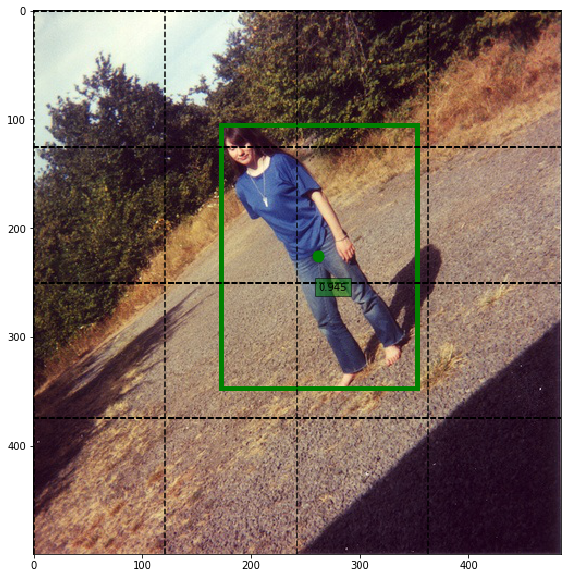

0 3 [0.5209322 0.5502546] [0.536762   0.48552135] 0.023500388 1.0
1 2 [0.51612234 0.5285175 ] [0.48275208 0.47985536] 0.03132085 1.0
2 1 [0.17877221 0.79539573] [0.37593144 0.48567206] 0.9364486 0.0


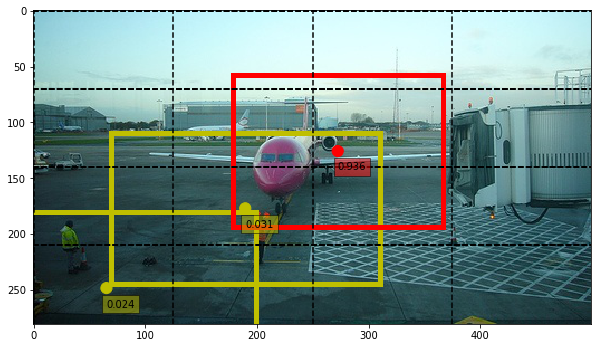

0 1 [0.48309067 0.5577463 ] [0.55415034 0.54147726] 0.010602853 1.0
2 1 [0.14713484 0.8272622 ] [0.36064133 0.48111442] 0.95799595 1.0
3 2 [0.53620434 0.3934748 ] [0.51225275 0.5729606 ] 0.010753292 1.0


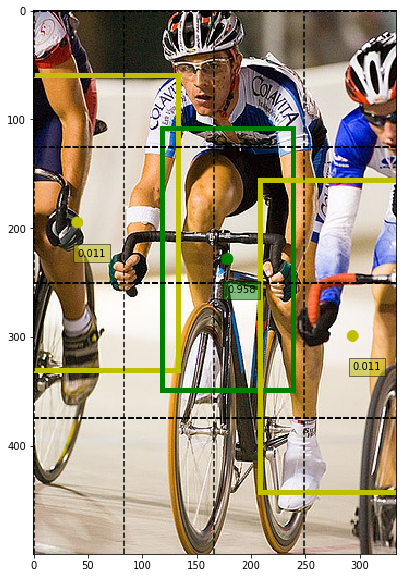

0 1 [0.48398393 0.5539883 ] [0.5505282  0.53907984] 0.013757548 1.0
1 2 [0.5175773  0.53138876] [0.48103532 0.4780169 ] 0.0229517 1.0
2 1 [0.15945476 0.8146644 ] [0.3661341  0.48349655] 0.9498798 0.0


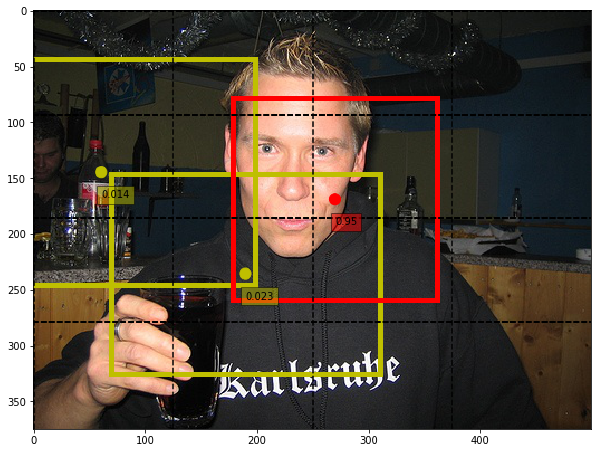

1 2 [0.52196956 0.5391247 ] [0.47618207 0.47251612] 0.0093133915 1.0
2 1 [0.11469842 0.8609214 ] [0.34181163 0.47545832] 0.9750201 0.0


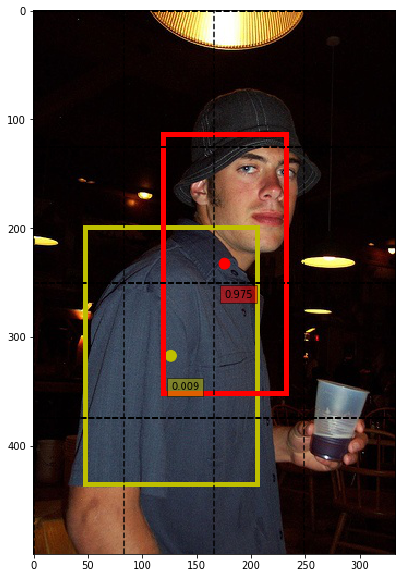

In [17]:
from src.data.VOC2012.plot import plot_grid
from src.models.DataGen import DataGenGrid

datagen = DataGenGrid(batch_size=32, input_size=(256,256), validation_split=0)

num_predictions = 5
pred = model.predict_generator(datagen.flow_train(df.head(num_predictions)))
for i in range(num_predictions):
    plot_grid(df, i, np.array(pred[i][0]), plot_ground_truth=False)

In [90]:
pred[0][0][0]

array([0.5078126 , 0.5303503 , 0.5297393 , 0.48233554, 0.35764232],
      dtype=float32)

In [86]:
pred[0]

array([[[0.5059632 , 0.53553087, 0.5284923 , 0.48383707, 0.35758469],
        [0.5164336 , 0.53907704, 0.5816655 , 0.532524  , 0.37472382],
        [0.4182749 , 0.46908224, 0.45884585, 0.54928166, 0.39312497],
        [0.48360792, 0.5512287 , 0.5209126 , 0.52135485, 0.42469203],
        [0.50424194, 0.51853096, 0.53497726, 0.4444174 , 0.42064163],
        [0.47094566, 0.46585226, 0.5267957 , 0.5168556 , 0.3720748 ],
        [0.48405442, 0.5294593 , 0.5409071 , 0.52254546, 0.34478155],
        [0.49500084, 0.56169903, 0.46012735, 0.4406833 , 0.40107173],
        [0.49937543, 0.47673818, 0.5664431 , 0.47407955, 0.43024608],
        [0.21639702, 0.761553  , 0.37021655, 0.50556093, 0.5697104 ],
        [0.47863102, 0.48109508, 0.48669013, 0.4830726 , 0.3639734 ],
        [0.5033041 , 0.5647986 , 0.54176533, 0.535911  , 0.45747417],
        [0.46673387, 0.52635723, 0.5540454 , 0.5137515 , 0.3696147 ],
        [0.48372614, 0.47703862, 0.5657282 , 0.5569415 , 0.40457794],
        [0.5667548 ,